（1）正在读取Excel文件...
 -> 数据参数准备完成。

--- 开始执行遗传算法 (情景: waste) ---


进化中: 100%|██████████| 200/200 [01:12<00:00,  2.74it/s]


--- 遗传算法优化完成 ---

情景 waste 求解完成。
 -> 最优7年总利润: 29,876,451.25 元

--- 开始执行遗传算法 (情景: discount) ---


进化中: 100%|██████████| 200/200 [01:14<00:00,  2.69it/s]

--- 遗传算法优化完成 ---

情景 discount 求解完成。
 -> 最优7年总利润: 43,230,758.62 元
情景 waste 的最优方案已保存至: c:\Users\86185\Desktop\2024C\3问题一\..\Result\result1_waste.xlsx
情景 discount 的最优方案已保存至: c:\Users\86185\Desktop\2024C\3问题一\..\Result\result1_discount.xlsx

所有求解任务完成！


--- 正在生成情景 'waste' 的收敛曲线 ---
收敛曲线图已成功保存至: c:\Users\86185\Desktop\2024C\3问题一\..\Result\convergence_waste.png


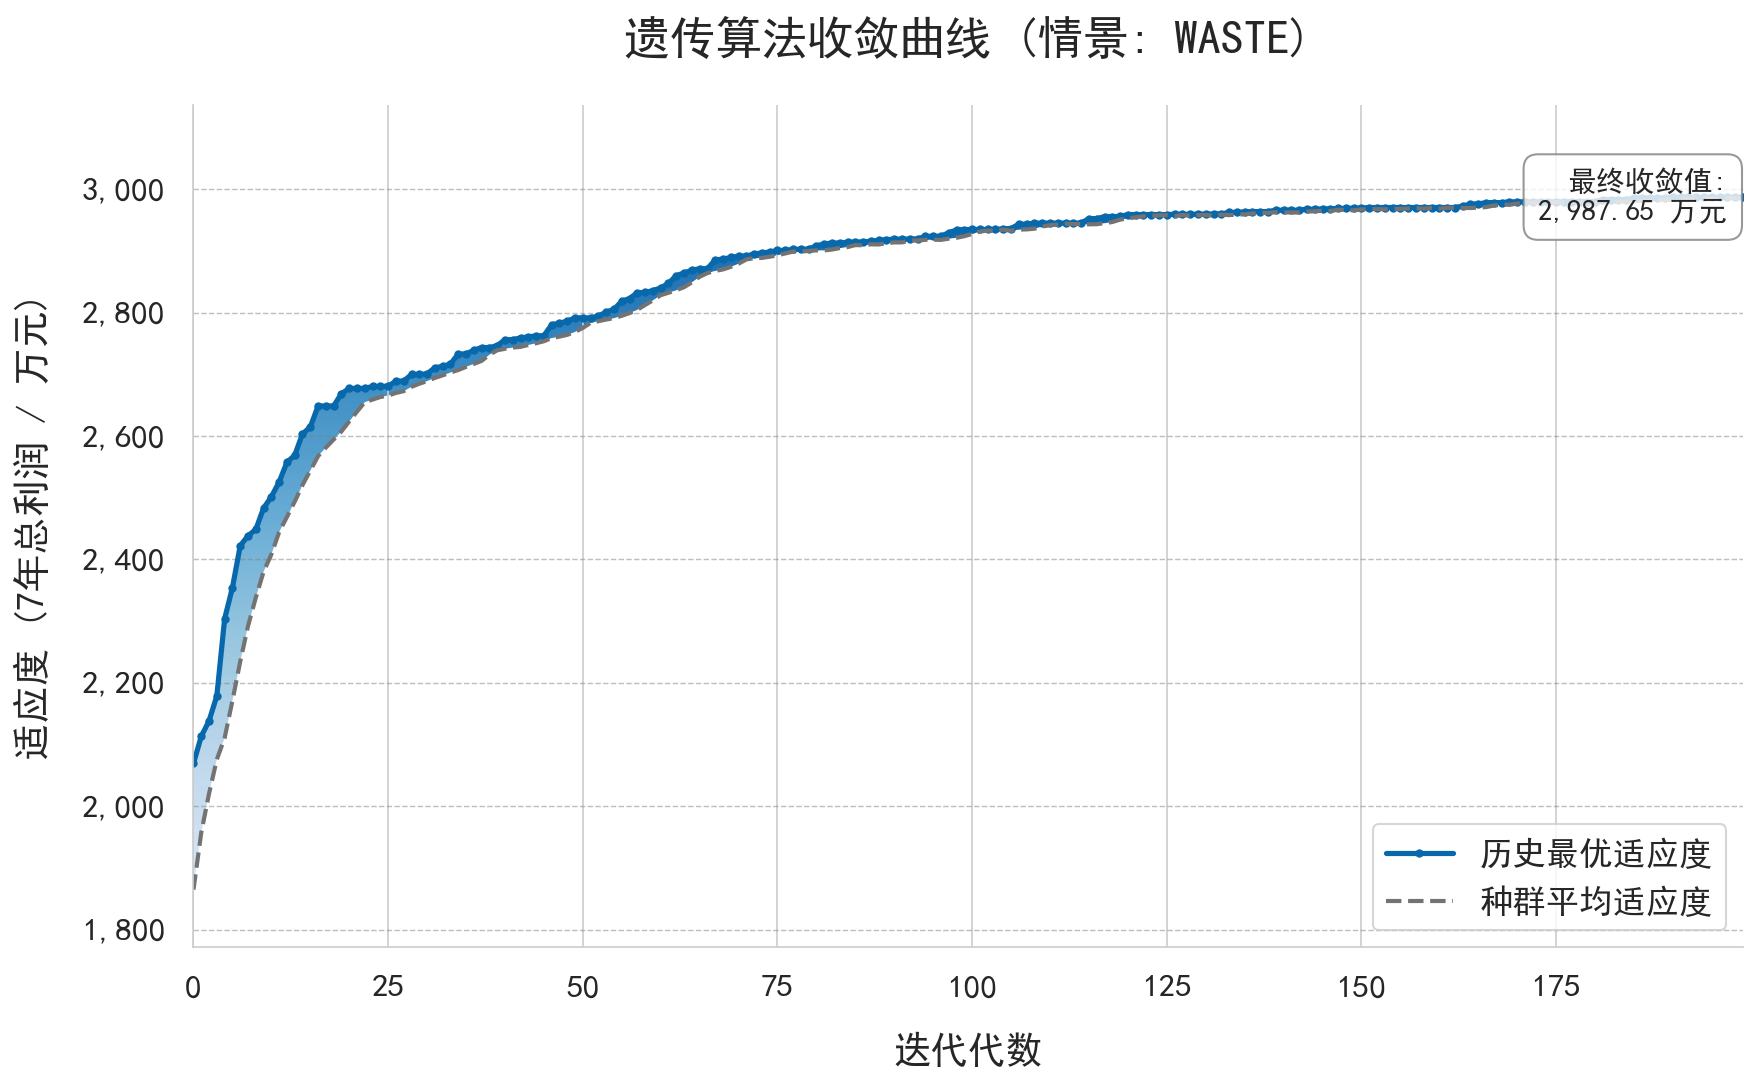


--- 正在生成情景 'discount' 的收敛曲线 ---
收敛曲线图已成功保存至: c:\Users\86185\Desktop\2024C\3问题一\..\Result\convergence_discount.png


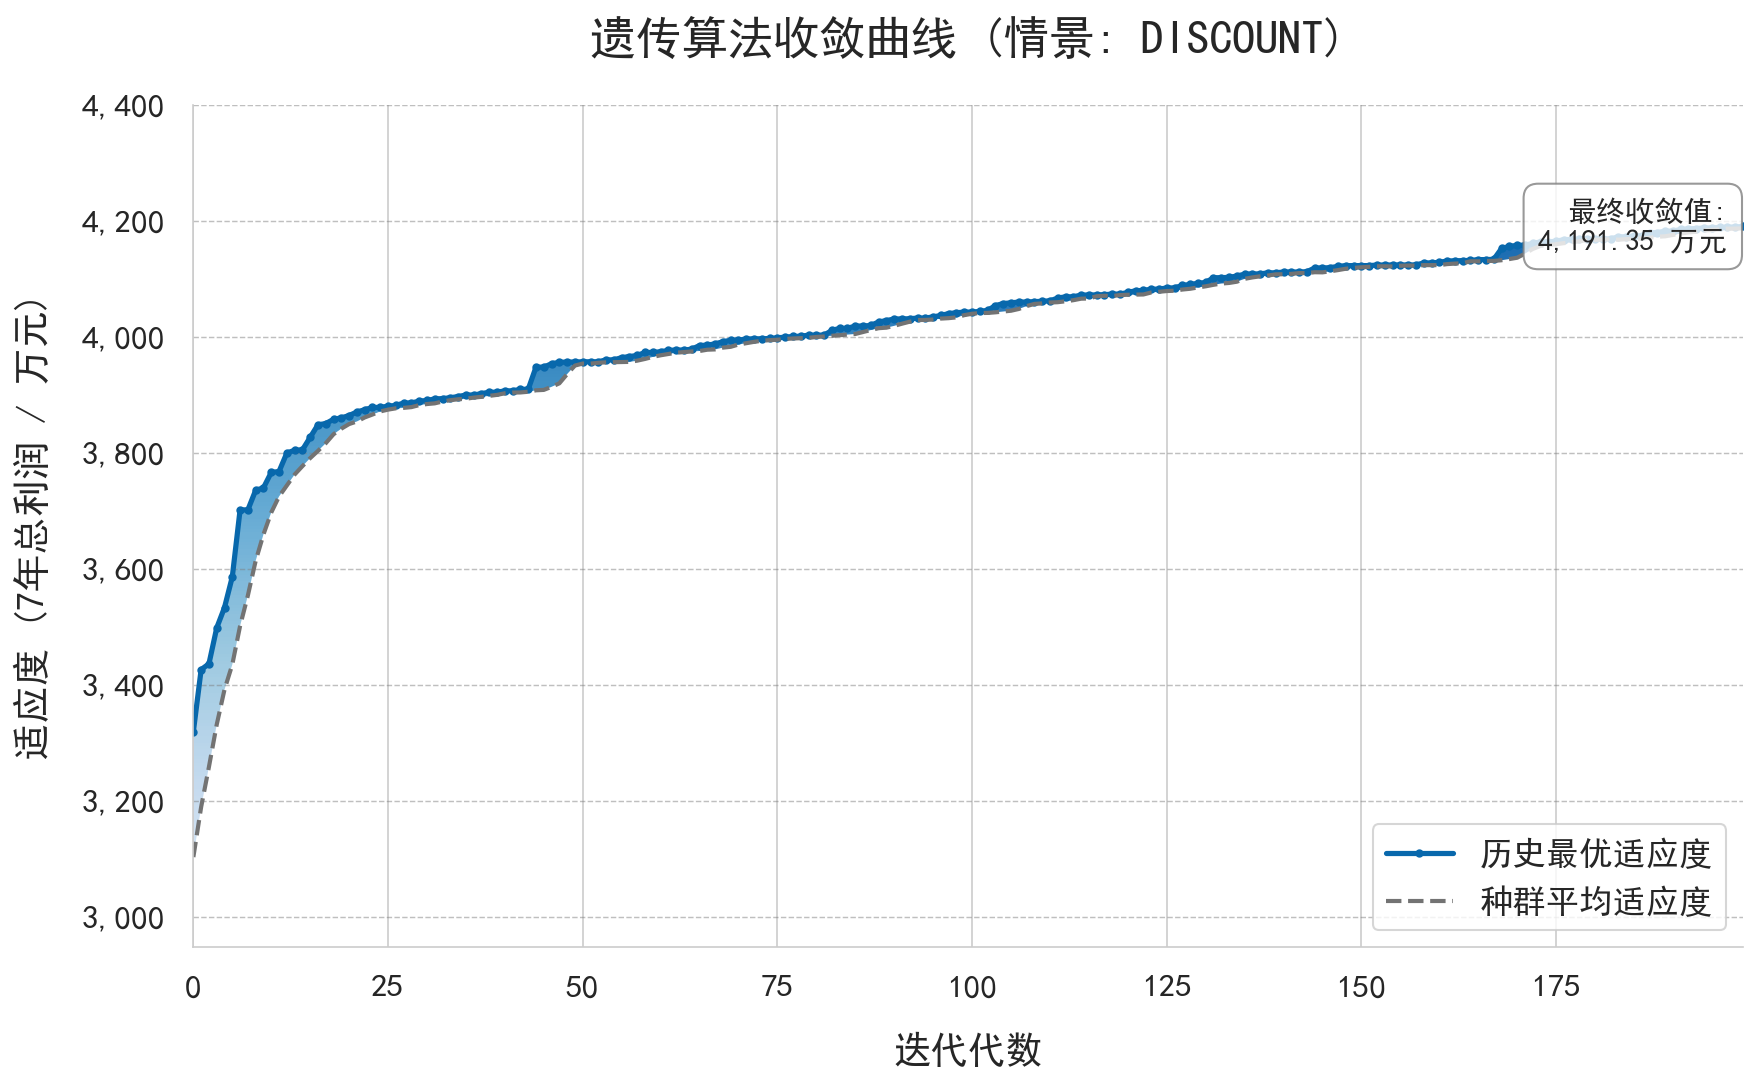

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from matplotlib.transforms import TransformedPath
from matplotlib.ticker import FuncFormatter

def plot_convergence_final_style(log_path, output_path, scenario):
    """
    绘制最终风格的遗传算法收敛曲线图。
    """
    # --- 1. 设置字体与全局样式 ---
    plt.rcParams['font.family'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.size'] = 16

    try:
        df = pd.read_csv(log_path)
    except FileNotFoundError:
        print(f"警告: 日志文件 {log_path} 未找到，无法绘图。")
        return

    # --- 2. 绘制收敛曲线图 ---
    fig, ax = plt.subplots(figsize=(12, 7.5), dpi=150)

    # 绘制曲线
    color_best = '#0868ac' # 专业蓝
    color_avg = '#737373'  # 中性灰
    ax.plot(df['Generation'], df['Best_Fitness'], color=color_best, linewidth=2.5, marker='o', markersize=3, label='历史最优适应度')
    ax.plot(df['Generation'], df['Average_Fitness'], color=color_avg, linewidth=2.0, linestyle='--', label='种群平均适应度')

    # --- 3. 实现上下渐变色填充 ---
    cmap = plt.get_cmap('Blues') 
    gradient_fill_colors = cmap(np.linspace(0.1, 0.9, 256))
    gradient_fill_cmap = plt.matplotlib.colors.ListedColormap(gradient_fill_colors)

    # 使用imshow创建渐变背景，并用曲线区域进行裁剪
    z = np.linspace(0, 1, 256).reshape(256, 1)
    y_min, y_max = ax.get_ylim()
    # 扩展y轴范围以确保渐变完全覆盖
    ax.set_ylim(bottom=df['Average_Fitness'].min() * 0.95, top=df['Best_Fitness'].max() * 1.05)
    y_min, y_max = ax.get_ylim()

    im = ax.imshow(z, aspect='auto', origin='lower', extent=[df['Generation'].min(), df['Generation'].max(), y_min, y_max], cmap=gradient_fill_cmap, zorder=0)

    path_data = np.array([
        df['Generation'].tolist() + df['Generation'].tolist()[::-1], 
        df['Average_Fitness'].tolist() + df['Best_Fitness'].tolist()[::-1]
    ]).transpose()
    path = plt.matplotlib.path.Path(path_data)
    clip_path = TransformedPath(path, ax.transData)
    im.set_clip_path(clip_path)

    # --- 4. 格式化与美化 ---
    ax.set_title(f'遗传算法收敛曲线 (情景: {scenario.upper()})', fontsize=22, pad=25, weight='bold')
    ax.set_xlabel('迭代代数', fontsize=18, labelpad=15)
    ax.set_ylabel('适应度 (7年总利润 / 万元)', fontsize=18, labelpad=15)

    ax.grid(True, axis='y', linestyle='--', linewidth=0.7, color='grey', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')

    ax.legend(loc='lower right', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16, pad=10)
    
    # 格式化Y轴为“万元”
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y/1e4:,.0f}'))

    # 在曲线末端添加最终值注释
    final_value = df['Best_Fitness'].iloc[-1]
    ax.text(df['Generation'].iloc[-1] - 2, final_value, f'最终收敛值:\n{final_value/1e4:,.2f} 万元',
            ha='right', va='center', fontsize=14,
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", lw=1, alpha=0.8))

    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    print(f"收敛曲线图已成功保存至: {output_path}")
    plt.show()


if __name__ == '__main__':
    current_dir = Path.cwd()
    output_dir = current_dir / '..' / 'Result'

    # 定义文件路径
    log_path_waste = output_dir / 'ga_log_waste.csv'
    plot_path_waste = output_dir / 'convergence_waste.png'
    log_path_discount = output_dir / 'ga_log_discount.csv'
    plot_path_discount = output_dir / 'convergence_discount.png'

    # 分别调用绘图函数
    print("--- 正在生成情景 'waste' 的收敛曲线 ---")
    plot_convergence_final_style(log_path_waste, plot_path_waste, 'waste')

    print("\n--- 正在生成情景 'discount' 的收敛曲线 ---")
    plot_convergence_final_style(log_path_discount, plot_path_discount, 'discount')

（1）正在读取Excel文件...
 -> 数据参数准备完成。

正在对参数 p 进行灵敏度分析...


测试不同的p值:  25%|██▌       | 1/4 [01:05<03:16, 65.60s/it]

p = 1 时，最优利润 = 4,888,140.88 元


测试不同的p值:  50%|█████     | 2/4 [02:17<02:18, 69.44s/it]

p = 2 时，最优利润 = 42,876,491.62 元


测试不同的p值:  75%|███████▌  | 3/4 [04:11<01:29, 89.72s/it]

p = 3 时，最优利润 = 42,972,886.62 元


测试不同的p值: 100%|██████████| 4/4 [06:12<00:00, 93.06s/it] 


p = 4 时，最优利润 = 42,367,421.25 元

正在对参数 q 进行灵敏度分析...


测试不同的q值:  25%|██▌       | 1/4 [01:46<05:18, 106.04s/it]

q = 2 时，最优利润 = 42,084,435.00 元


测试不同的q值:  50%|█████     | 2/4 [03:32<03:32, 106.38s/it]

q = 3 时，最优利润 = 42,532,157.88 元


测试不同的q值:  75%|███████▌  | 3/4 [04:56<01:36, 96.24s/it] 

q = 4 时，最优利润 = 43,034,533.12 元


测试不同的q值: 100%|██████████| 4/4 [06:15<00:00, 93.91s/it]

q = 5 时，最优利润 = 42,865,075.75 元



灵敏度分析图像已保存至: c:\Users\86185\Desktop\2024C\3问题一\..\Result\sensitivity_p_q.png


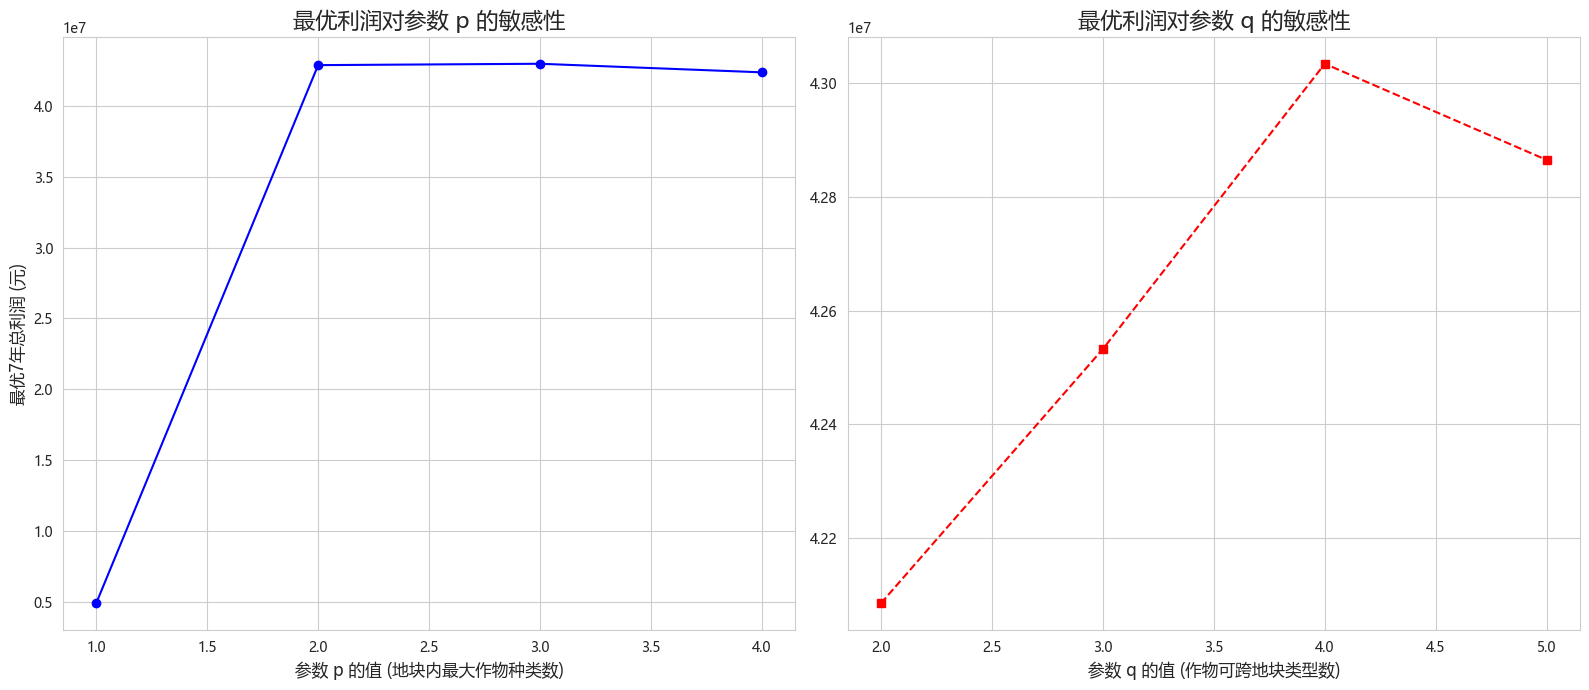


所有分析任务完成！


In [ ]:
# -*- coding: utf-8 -*-
# 文件名: plot_discrete_heatmap_green_theme.py
# 功能: 采用统一的绿色系主题，并保持所有最终版布局和排序。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

# --- 1. 绘图与文件路径配置 ---

# 设置绘图风格以符合学术审美
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 150

# 定义大字号
SUPTITLE_FONT_SIZE = 30
LABEL_FONT_SIZE = 22
YLABEL_FONT_SIZE = 20
CBAR_LABEL_FONT_SIZE = 16
XTICK_FONT_SIZE = 16
YTICK_FONT_SIZE = 14


# --- 文件路径定义 ---
INPUT_RESULT_XLSX = Path('./Result/result1_1.xlsx')
INPUT_ATTACHMENT_XLSX = Path('../Data/附件1.xlsx')
OUTPUT_IMAGE_PATH = Path('./Result/2024年最优种植方案（绿色系主题）.png')


# --- 2. 数据加载与核心解析 ---

try:
    print("正在加载数据...")
    full_df = pd.read_excel(INPUT_RESULT_XLSX)
    crop_types_df = pd.read_excel(INPUT_ATTACHMENT_XLSX, sheet_name='乡村种植的农作物')

    # --- 根据作物类型进行智能排序 ---
    crop_to_type_map = dict(zip(crop_types_df['作物名称'], crop_types_df['作物类型']))
    all_crops_in_data = sorted(full_df['作物名称'].unique())
    sort_df = pd.DataFrame({'作物': all_crops_in_data})
    sort_df['类型'] = sort_df['作物'].map(crop_to_type_map)
    sort_df['类型'].fillna('其他', inplace=True)
    sort_df.sort_values(by=['类型', '作物'], inplace=True)
    all_crops_master_list = sort_df['作物'].tolist()
    print("横轴作物排序完成。")

    # --- 数据筛选与准备 ---
    print("筛选并处理2024年数据...")
    df = full_df[full_df['年份'] == 2024].copy()
    
    if df.empty:
        print("错误：在文件中没有找到年份为 2024 的数据记录。")
    else:
        df.rename(columns={'地块编号': '地块', '作物名称': '作物', '种植面积（亩）': '面积'}, inplace=True)
        season_map = {1: '第一季', 2: '第二季'}
        df['季节'] = df['季节'].map(season_map)
        df = df[df['面积'] > 0.01].copy()
        
        # --- 3. 为绘图准备数据 (数据透视) ---
        df_s1 = df[df['季节'] == '第一季'].copy()
        df_s2 = df[df['季节'] == '第二季'].copy()
        pivot_s1 = df_s1.pivot_table(index='地块', columns='作物', values='面积') if not df_s1.empty else pd.DataFrame()
        pivot_s2 = df_s2.pivot_table(index='地块', columns='作物', values='面积') if not df_s2.empty else pd.DataFrame()
        
        plots_s1 = sorted(df_s1['地块'].unique())
        plots_s2 = sorted(df_s2['地块'].unique())
        
        pivot_s1 = pivot_s1.reindex(index=plots_s1, columns=all_crops_master_list)
        pivot_s2 = pivot_s2.reindex(index=plots_s2, columns=all_crops_master_list)
        v_max_s1 = df_s1['面积'].max()

        # --- 4. 核心绘图模块 ---
        
        # --- 【核心修改】创建统一的绿色系颜色集 ---
        # 第一季：使用黄绿色系 (YlGn)
        original_cmap_s1 = cm.get_cmap('YlGn')
        new_colors_s1 = original_cmap_s1(np.linspace(0.2, 1, 256))
        custom_cmap_s1 = LinearSegmentedColormap.from_list("custom_ylgn", new_colors_s1)

        # 第二季：使用纯绿色系 (Greens)
        original_cmap_s2 = cm.get_cmap('Greens')
        new_colors_s2 = original_cmap_s2(np.linspace(0.2, 1, 256))
        custom_cmap_s2 = LinearSegmentedColormap.from_list("custom_greens", new_colors_s2)
        
        print("开始绘制绿色系主题热力图...")
        
        fig = plt.figure(figsize=(24, 12)) 
        
        height_ratios = [len(plots_s1) + 1, len(plots_s2) + 1]
        gs = GridSpec(nrows=2, ncols=1, height_ratios=height_ratios, hspace=0.15)
        
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.tick_params(axis='x', length=0)

        cbar_params = { 'label': '种植面积 (亩)', 'shrink': 1.0 }

        # 绘制第一季
        sns.heatmap(pivot_s1, ax=ax1, cmap=custom_cmap_s1, # 使用新的绿色系
                    linewidths=0.5, linecolor='white', cbar=True, vmin=0, vmax=v_max_s1,
                    cbar_kws=cbar_params)
        ax1.set_title('')
        ax1.set_ylabel('第一季', fontsize=YLABEL_FONT_SIZE, weight='bold')
        ax1.set_xlabel('')
        ax1.figure.axes[-1].yaxis.label.set_size(CBAR_LABEL_FONT_SIZE)

        # 绘制第二季
        sns.heatmap(pivot_s2, ax=ax2, cmap=custom_cmap_s2, # 使用新的绿色系
                    linewidths=0.5, linecolor='white', cbar=True, vmin=0, vmax=22,
                    cbar_kws=cbar_params)
        ax2.set_title('')
        ax2.set_ylabel('第二季', fontsize=YLABEL_FONT_SIZE, weight='bold')
        ax2.set_xlabel('作物种类 (按类型排序)', fontsize=LABEL_FONT_SIZE)
        ax2.figure.axes[-1].yaxis.label.set_size(CBAR_LABEL_FONT_SIZE)
        
        plt.xticks(rotation=60, ha='right', fontsize=XTICK_FONT_SIZE)
        ax1.tick_params(axis='y', labelsize=YTICK_FONT_SIZE, rotation=0)
        ax2.tick_params(axis='y', labelsize=YTICK_FONT_SIZE, rotation=0)

        fig.suptitle('2024年最优种植方案', fontsize=SUPTITLE_FONT_SIZE, weight='bold')
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])

        # --- 5. 保存与显示 ---
        OUTPUT_IMAGE_PATH.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(OUTPUT_IMAGE_PATH, dpi=300)
        print(f"\n图表已成功保存至: {OUTPUT_IMAGE_PATH}")
        
        plt.show()

except FileNotFoundError as e:
    print(f"错误：无法找到数据文件。请检查您的文件路径是否正确。")
    print(f"1. 结果文件应在: {INPUT_RESULT_XLSX.resolve()}")
    print(f"2. 附件文件应在: {INPUT_ATTACHMENT_XLSX.resolve()}")
except KeyError as e:
    print(f"错误：文件中似乎缺少必需的列: {e}。")
except Exception as e:
    print(f"程序发生未知错误: {e}")
    import traceback
    traceback.print_exc()

 -> 数据参数准备完成。

正在对土地面积进行灵敏度分析...

--- 计算基准情景 (100% 面积)... ---
基准情景最优利润 = 39,349,297.50 元


分析地块类型: 水浇地: 100%|██████████| 5/5 [03:41<00:00, 44.21s/it]



面积灵敏度分析图像已保存至: c:\Users\86185\Desktop\2024C\3问题一\..\Result\sensitivity_area.png


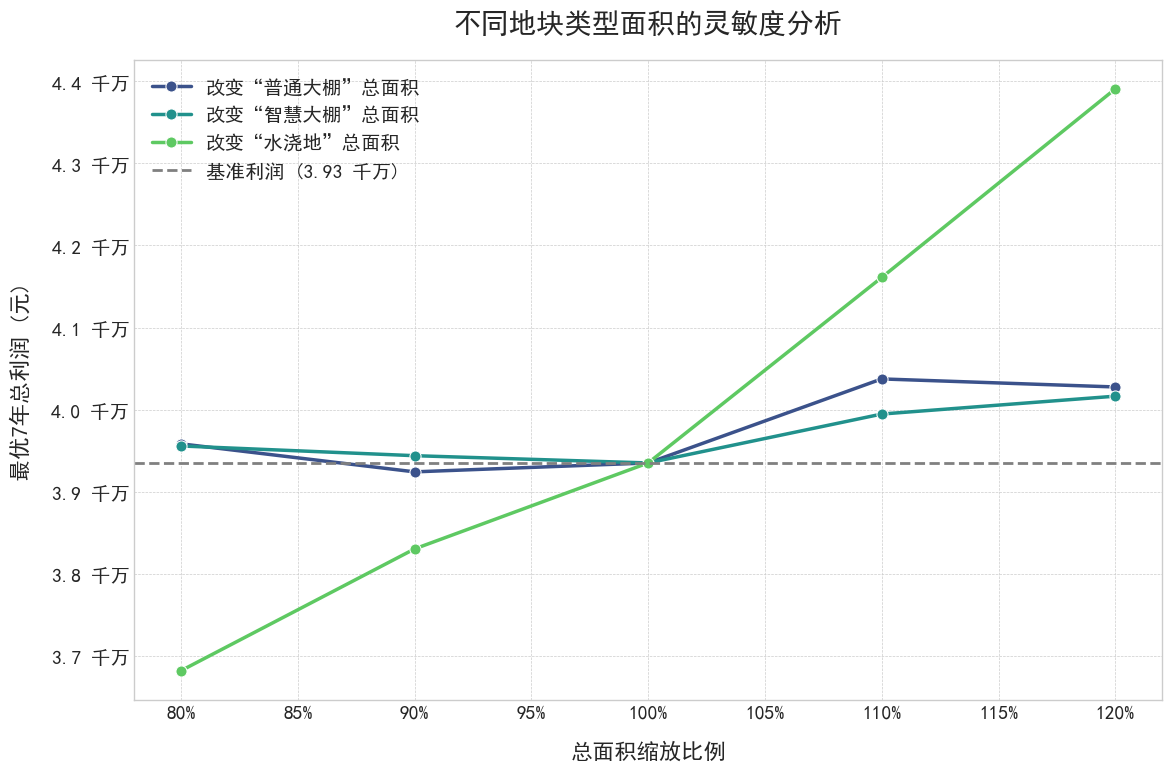


所有分析任务完成！


In [ ]:
# -*- coding: utf-8 -*-
# 文件名: run_sensitivity_analysis_area.py
# 功能: 对不同地块类型的总面积进行灵敏度分析

import pandas as pd
import numpy as np
import os
import re
import random
import copy
from pathlib import Path
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. 分析与算法配置区 ---

# [新增] 面积灵敏度分析参数
# 选择要分析的地块类型 (注意名称必须与Excel中完全一致)
LAND_TYPES_TO_ANALYZE = ['普通大棚', '智慧大棚', '水浇地'] 
# 面积缩放系数范围
AREA_SCALING_FACTORS = [0.8, 0.9, 1.0, 1.1, 1.2] 

# GA参数 (为节省时间，可以适当减少代数)
POP_SIZE = 80
MAX_GEN = 150 
CX_PROB = 0.8
MUT_PROB = 0.2
TOURNAMENT_SIZE = 3
ELITISM_SIZE = 5

# --- 2. 核心功能函数 (与之前版本相同) ---

def load_and_prepare_data(data_path):
    # (此函数内容与上一版完全相同，为简洁此处折叠)
    try:
        path_f1 = os.path.join(data_path, '附件1.xlsx'); path_f2 = os.path.join(data_path, '附件2.xlsx')
        plots_df = pd.read_excel(path_f1, sheet_name='乡村的现有耕地'); crops_info_df = pd.read_excel(path_f1, sheet_name='乡村种植的农作物')
        stats_df = pd.read_excel(path_f2, sheet_name='2023年统计的相关数据'); past_planting_df = pd.read_excel(path_f2, sheet_name='2023年的农作物种植情况')
    except Exception as e: print(f"错误: 读取Excel文件失败。具体错误: {e}"); return None
    for df in [plots_df, crops_info_df, stats_df, past_planting_df]: df.columns = df.columns.str.strip()
    params = {}
    params['I_plots'] = sorted(plots_df['地块名称'].tolist()); params['J_crops'] = sorted(crops_info_df['作物名称'].dropna().unique().tolist())
    params['P_area'] = dict(zip(plots_df['地块名称'], plots_df['地块面积/亩'])); params['P_plot_type'] = dict(zip(plots_df['地块名称'], plots_df['地块类型']))
    params['P_crop_type'] = dict(zip(crops_info_df['作物名称'], crops_info_df['作物类型'])); bean_keywords = ['豆', '豆类']; params['J_bean'] = [j for j, ctype in params['P_crop_type'].items() if isinstance(ctype, str) and '豆' in ctype]
    params['P_past'] = {i: {1: None, 2: None} for i in params['I_plots']}
    for _, row in past_planting_df.iterrows():
        plot, crop = row['种植地块'], row['作物名称']; season = row.get('种植季节', 1) 
        if plot in params['I_plots']: params['P_past'][plot][season] = crop
    def clean_and_convert_price(value):
        if isinstance(value, str) and any(c in value for c in '-–—'):
            parts = re.split(r'[-–—]', value.strip());
            try: return (float(parts[0]) + float(parts[1])) / 2
            except (ValueError, IndexError): return np.nan
        return pd.to_numeric(value, errors='coerce')
    stats_df['销售单价/(元/斤)'] = stats_df['销售单价/(元/斤)'].apply(clean_and_convert_price); stats_df['亩产量/斤'] = pd.to_numeric(stats_df['亩产量/斤'], errors='coerce'); stats_df['种植成本/(元/亩)'] = pd.to_numeric(stats_df['种植成本/(元/亩)'], errors='coerce')
    stats_df.dropna(subset=['亩产量/斤', '种植成本/(元/亩)', '销售单价/(元/斤)'], inplace=True)
    params['P_yield'], params['P_cost'], params['P_price'] = {}, {}, {}
    for _, row in stats_df.iterrows():
        key = (row['作物名称'], row['地块类型']); params['P_cost'][key] = row['种植成本/(元/亩)']; params['P_yield'][key] = row['亩产量/斤']; params['P_price'][key] = row['销售单价/(元/斤)']
    for crop in params['J_crops']:
        for plot_type in plots_df['地块类型'].unique():
            key = (crop, plot_type)
            if key not in params['P_yield']: params['P_yield'][key], params['P_cost'][key], params['P_price'][key] = 0, 9e9, 0
    params['P_demand'] = {j: 0 for j in params['J_crops']}
    temp_details = pd.merge(past_planting_df, plots_df, left_on='种植地块', right_on='地块名称')
    for j in params['J_crops']:
        total_yield = sum(params['P_yield'].get((j, row['地块类型']), 0) * row.get('种植面积/亩', params['P_area'][row['地块名称']]) for _, row in temp_details[temp_details['作物名称'] == j].iterrows())
        params['P_demand'][j] = total_yield if total_yield > 0 else 1000
    params['S_suitability'] = {}; restricted_veg = ['大白菜', '白萝卜', '红萝卜']
    for i in params['I_plots']:
        plot_t = params['P_plot_type'].get(i, '')
        for j in params['J_crops']:
            crop_t = params['P_crop_type'].get(j, ''); is_veg = '蔬菜' in str(crop_t)
            for k in [1, 2]:
                suitable = 0
                if plot_t in ['平旱地', '梯田', '山坡地'] and ('粮食' in str(crop_t) or j in params['J_bean']) and k == 1: suitable = 1
                elif plot_t == '水浇地':
                    if '水稻' in j:
                        if k == 1: suitable = 1
                    elif is_veg:
                        if j not in restricted_veg and k == 1: suitable = 1
                        elif j in restricted_veg and k == 2: suitable = 1
                elif plot_t == '普通大棚':
                    if is_veg and j not in restricted_veg and k == 1: suitable = 1
                    elif '食用菌' in str(crop_t) and k == 2: suitable = 1
                elif plot_t == '智慧大棚' and is_veg and j not in restricted_veg: suitable = 1
                params['S_suitability'][(i, j, k)] = suitable
    print(" -> 数据参数准备完成。")
    return params

def crossover(parent1, parent2, params):
    """
    单点交叉：随机选择一年和一个季节，将该点之后的所有决策从parent2拷贝到child
    """
    child = copy.deepcopy(parent1)
    years = list(parent1.keys())
    k_seasons = [1, 2]
    y_point = random.choice(years)
    k_point = random.choice(k_seasons)
    for y in years:
        for k in k_seasons:
            if (y > y_point) or (y == y_point and k >= k_point):
                for i in params['I_plots']:
                    child[y][k][i] = parent2[y][k][i]
    return child

def mutate(solution, params):
    """
    随机变异：随机选择一年、季节、地块，重新分配一个可行作物
    """
    years = list(solution.keys())
    k_seasons = [1, 2]
    y = random.choice(years)
    k = random.choice(k_seasons)
    i = random.choice(params['I_plots'])
    possible_crops = [j for j in params['J_crops'] if params['S_suitability'].get((i, j, k), 0) == 1 and params['P_cost'].get((j, params['P_plot_type'][i]), 9e9) < 1e9]
    if possible_crops:
        solution[y][k][i] = random.choice(possible_crops)
    return solution

class GeneticAlgorithm:
    # (整个类的代码与上一版修复式GA完全相同，为简洁此处折叠)
    def __init__(self, params, scenario):
        self.params = params; self.scenario = scenario; self.years = list(range(2024, 2031))
    def create_initial_solution(self):
        solution = {y: {k: {i: None for i in self.params['I_plots']} for k in [1, 2]} for y in self.years}
        for y in self.years:
            for i in self.params['I_plots']:
                for k in [1, 2]:
                    possible_crops = [j for j in self.params['J_crops'] if self.params['S_suitability'].get((i, j, k), 0) == 1 and self.params['P_cost'].get((j, self.params['P_plot_type'][i]), 9e9) < 1e9]
                    if possible_crops: solution[y][k][i] = random.choice(possible_crops)
        return self.repair_solution(solution)
    def repair_solution(self, solution):
        def get_crops_in_year(sol, y, i):
            crops = set()
            if y == 2023:
                for k in [1, 2]:
                    crop = self.params['P_past'].get(i, {}).get(k)
                    if crop: crops.add(crop)
            elif y in sol:
                for k in [1, 2]:
                    crop = sol.get(y, {}).get(k, {}).get(i)
                    if crop: crops.add(crop)
            return list(crops)
        for i in self.params['I_plots']:
            for y in self.years:
                crops_this_year = get_crops_in_year(solution, y, i); crops_last_year = get_crops_in_year(solution, y - 1, i)
                common_crops = set(crops_this_year) & set(crops_last_year)
                if common_crops:
                    for k in [1, 2]:
                        if solution[y][k][i] in common_crops:
                            possible_replacements = [j for j in self.params['J_crops'] if self.params['S_suitability'].get((i, j, k), 0) == 1 and self.params['P_cost'].get((j, self.params['P_plot_type'][i]), 9e9) < 1e9 and j not in crops_last_year]
                            solution[y][k][i] = random.choice(possible_replacements) if possible_replacements else None
        for i in self.params['I_plots']:
            if self.params['P_plot_type'].get(i) not in ['平旱地', '梯田', '山坡地', '水浇地']: continue
            all_years_sorted = [2023] + self.years
            for y_start_idx in range(len(all_years_sorted) - 2):
                window = all_years_sorted[y_start_idx : y_start_idx + 3]
                contains_bean = any(c in self.params['J_bean'] for y_win in window for c in get_crops_in_year(solution, y_win, i))
                if not contains_bean:
                    for _ in range(5):
                        y_fix = random.choice([y for y in window if y > 2023]); k_fix = 1
                        crops_last_year_for_fix = get_crops_in_year(solution, y_fix - 1, i)
                        possible_beans = [b for b in self.params['J_bean'] if self.params['S_suitability'].get((i, b, k_fix), 0) == 1 and self.params['P_cost'].get((b, self.params['P_plot_type'][i]), 9e9) < 1e9 and b not in crops_last_year_for_fix]
                        if possible_beans: solution[y_fix][k_fix][i] = random.choice(possible_beans); break
        return solution
    def evaluate_fitness(self, solution):
        total_revenue, total_cost = 0, 0; total_production = defaultdict(float)
        for y in self.years:
            for i in self.params['I_plots']:
                plot_type = self.params['P_plot_type'][i]; area = self.params['P_area'][i]
                for k in [1, 2]:
                    crop = solution[y][k][i]
                    if not crop: continue
                    key = (crop, plot_type); cost = self.params['P_cost'].get(key, 0); yield_val = self.params['P_yield'].get(key, 0)
                    total_cost += area * cost; total_production[crop] += area * yield_val
        for crop, production in total_production.items():
            total_demand = self.params['P_demand'].get(crop, 0) * 7
            price = next((p for (c, pt), p in self.params['P_price'].items() if c == crop), 0)
            if self.scenario == 'waste': sold_qty = min(production, total_demand); total_revenue += sold_qty * price
            elif self.scenario == 'discount': normal_qty = min(production, total_demand); over_qty = production - normal_qty; total_revenue += (normal_qty * price) + (over_qty * price * 0.5)
        return total_revenue - total_cost
    def run(self):
        population = [self.create_initial_solution() for _ in range(POP_SIZE)]; best_fitness = -np.inf
        for gen in range(MAX_GEN):
            fitnesses = [self.evaluate_fitness(sol) for sol in population]; best_fit_gen = np.max(fitnesses)
            if best_fit_gen > best_fitness: best_fitness = best_fit_gen
            elite_indices = np.argsort(fitnesses)[-ELITISM_SIZE:]; new_population = [population[i] for i in elite_indices]
            while len(new_population) < POP_SIZE:
                def tournament_selection(pop, fits, k):
                    best_idx = random.randrange(len(pop));
                    for _ in range(k-1): idx=random.randrange(len(pop)); best_idx = idx if fits[idx]>fits[best_idx] else best_idx
                    return pop[best_idx]
                p1 = tournament_selection(population, fitnesses, TOURNAMENT_SIZE); p2 = tournament_selection(population, fitnesses, TOURNAMENT_SIZE)
                child = crossover(p1, p2, self.params) if random.random() < CX_PROB else copy.deepcopy(p1)
                if random.random() < MUT_PROB: child = mutate(child, self.params)
                new_population.append(self.repair_solution(child))
            population = new_population
        return best_fitness

# --- 3. [新增] 绘图函数 ---
def plot_area_sensitivity(results, baseline_profit, output_dir):
    """
    绘制面积灵敏度分析的折线图
    """
    # 遵照您的要求，设置高级、非热门、符合学术风格的图表
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['font.family'] = ['SimHei'] # 确保中文显示
    plt.rcParams['axes.unicode_minus'] = False

    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 使用一个更沉稳、高级的调色板
    palette = sns.color_palette("viridis", n_colors=len(results))

    for i, (land_type, df) in enumerate(results.items()):
        sns.lineplot(data=df, x='scale', y='profit', label=f'改变“{land_type}”总面积', 
                     marker='o', markersize=8, linewidth=2.5, color=palette[i])

    # 添加基准线
    ax.axhline(y=baseline_profit, color='grey', linestyle='--', linewidth=2, label=f'基准利润 ({baseline_profit/1e7:,.2f} 千万)')

    # 美化图表
    ax.set_title('不同地块类型面积的灵敏度分析', fontsize=20, pad=20, weight='bold')
    ax.set_xlabel('总面积缩放比例', fontsize=16, labelpad=15)
    ax.set_ylabel('最优7年总利润 (元)', fontsize=16, labelpad=15)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # 格式化X轴和Y轴标签
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.0f}%'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{y/1e7:,.1f} 千万'))
    
    ax.legend(fontsize=14, loc='best')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    output_path = os.path.join(output_dir, "sensitivity_area.png")
    plt.savefig(output_path, dpi=300)
    print(f"\n面积灵敏度分析图像已保存至: {output_path}")
    plt.show()

# --- 4. 主程序 ---
if __name__ == '__main__':
    try:
        current_dir = Path(__file__).parent if "__file__" in locals() else Path.cwd()
        data_path = current_dir / '..' / 'Data'
        output_dir = current_dir / '..' / 'Result'
        output_dir.mkdir(parents=True, exist_ok=True)

        base_params = load_and_prepare_data(data_path)
        if not base_params: raise RuntimeError("数据加载失败。")

        # --- 灵敏度分析主循环 ---
        print("\n" + "="*50 + "\n正在对土地面积进行灵敏度分析...\n" + "="*50)
        
        # 运行一次基准情景
        print("\n--- 计算基准情景 (100% 面积)... ---")
        ga_solver_base = GeneticAlgorithm(base_params, 'discount')
        baseline_profit = ga_solver_base.run()
        print(f"基准情景最优利润 = {baseline_profit:,.2f} 元")

        analysis_results = {}
        
        # 循环遍历要分析的地块类型
        for land_type in LAND_TYPES_TO_ANALYZE:
            type_results_data = []
            
            # 循环遍历不同的缩放系数
            for scale in tqdm(AREA_SCALING_FACTORS, desc=f"分析地块类型: {land_type}"):
                
                # 如果是基准情况，直接使用已算出的结果
                if scale == 1.0:
                    type_results_data.append({'scale': 100, 'profit': baseline_profit})
                    continue

                # 创建临时参数副本进行修改
                temp_params = copy.deepcopy(base_params)
                
                # 修改对应地块类型的面积
                for plot_name, original_area in temp_params['P_area'].items():
                    if temp_params['P_plot_type'][plot_name] == land_type:
                        temp_params['P_area'][plot_name] = original_area * scale
                
                # 使用修改后的参数运行GA
                ga_solver = GeneticAlgorithm(temp_params, 'discount')
                best_profit = ga_solver.run()
                type_results_data.append({'scale': scale * 100, 'profit': best_profit})

            analysis_results[land_type] = pd.DataFrame(type_results_data)
        
        # --- 绘制结果 ---
        plot_area_sensitivity(analysis_results, baseline_profit, output_dir)

        print("\n所有分析任务完成！")

    except Exception as e:
        print(f"\n程序主流程发生错误: {e}")
        import traceback
        traceback.print_exc()

图像已保存至: 灵敏度分析图_最终修复版.png


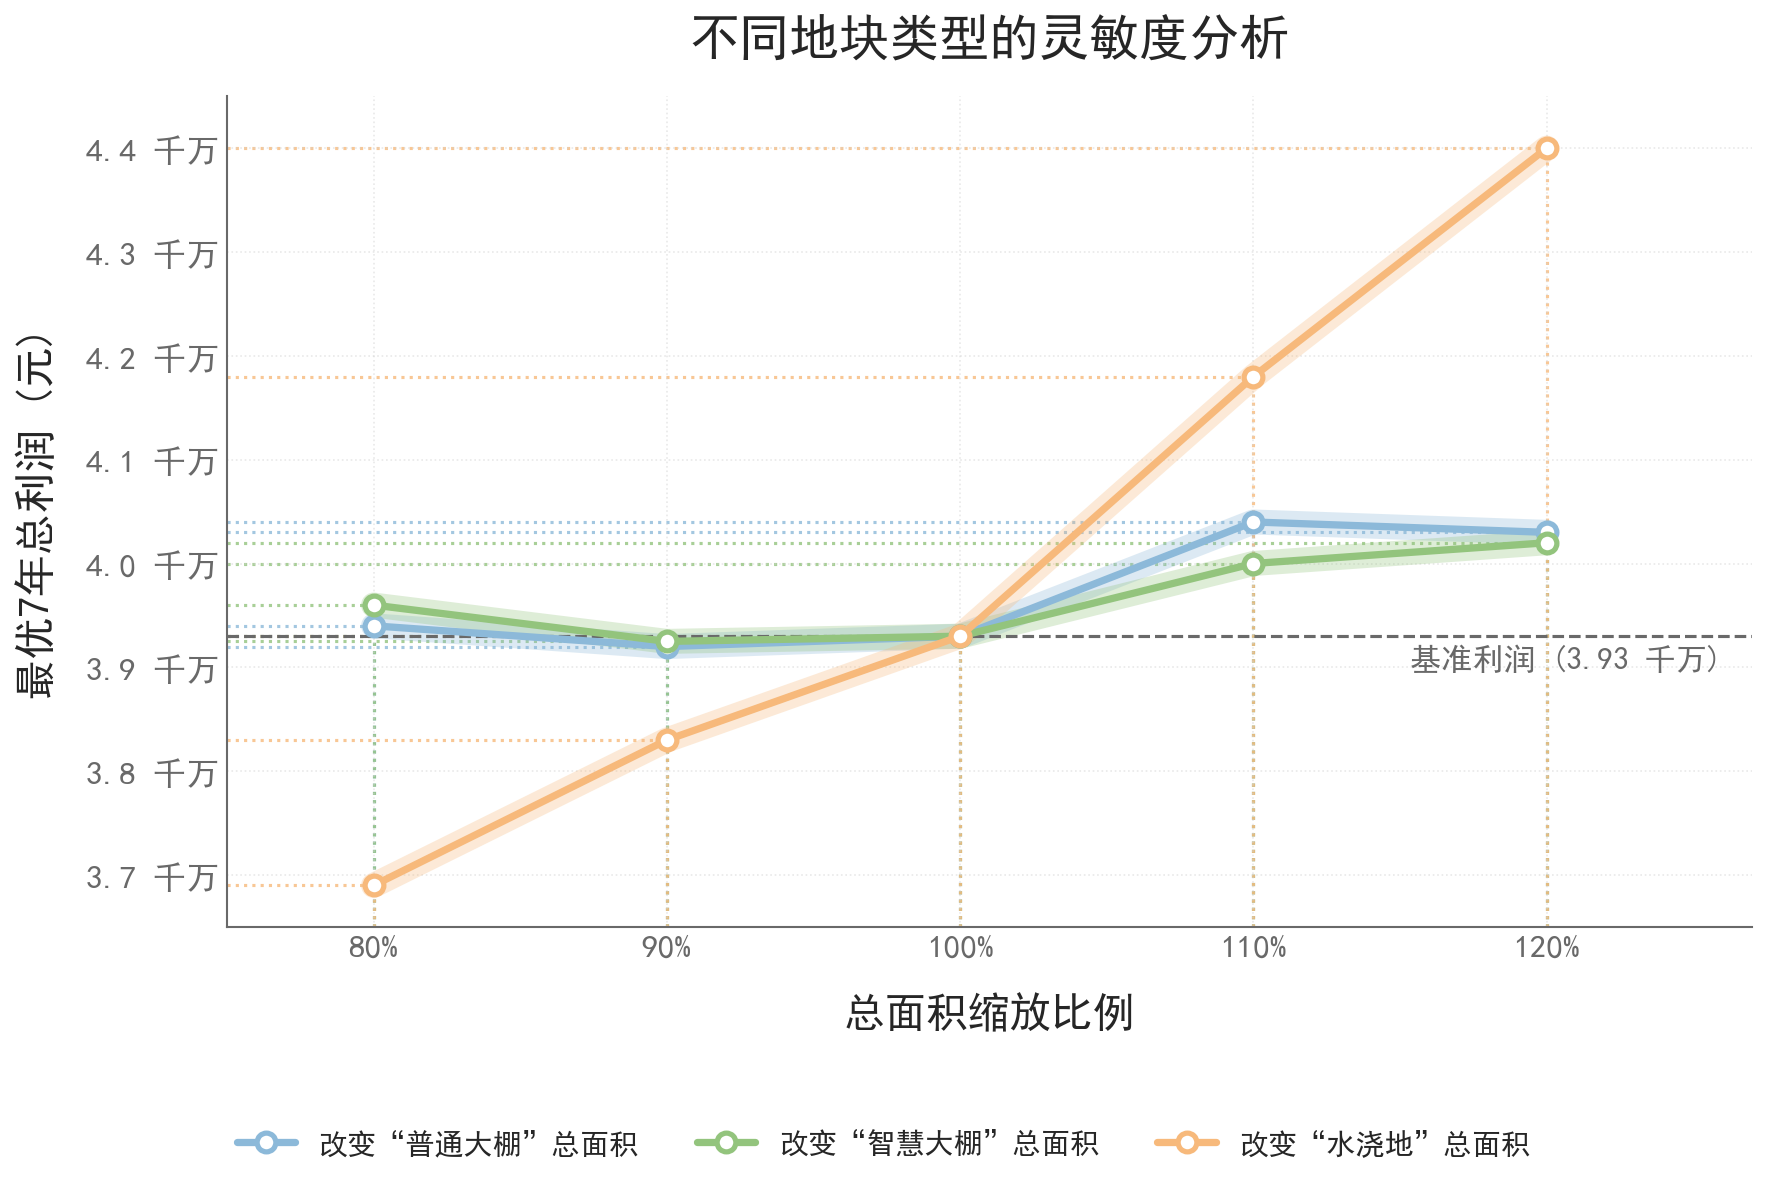

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# --- 1. 绘图风格和字体设置 ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14

# --- 2. 数据和颜色方案 ---
x_labels = ['80%', '90%', '100%', '110%', '120%']
x_values = np.array([80, 90, 100, 110, 120])

data = {
    '改变“普通大棚”总面积': np.array([3.94, 3.92, 3.93, 4.04, 4.03]) * 1e7,
    '改变“智慧大棚”总面积': np.array([3.96, 3.925, 3.93, 4.0, 4.02]) * 1e7,
    '改变“水浇地”总面积': np.array([3.69, 3.83, 3.93, 4.18, 4.4]) * 1e7
}
baseline_profit = 3.93 * 1e7

colors = {
    '改变“普通大棚”总面积': '#8CB9D9',
    '改变“智慧大棚”总面积': '#93C47D',
    '改变“水浇地”总面积': '#F7B97B'
}
baseline_color = 'dimgray'

# --- 3. 开始绘图 ---
# 设定一个最终协调的画布尺寸
fig, ax = plt.subplots(figsize=(12, 8))

# 预先设定坐标轴范围
ax.set_xlim(75, 127)
ax.set_ylim(3.65 * 1e7, 4.45 * 1e7)

# 绘制折线图，并收集图例句柄
handles = []
labels = []
for label_full, y_values in data.items():
    color = colors.get(label_full)

    # 绘制辅助虚线
    for i in range(len(x_values)):
        ax.vlines(x=x_values[i], ymin=ax.get_ylim()[0], ymax=y_values[i],
                  color=color, linestyle=':', linewidth=1.5, alpha=0.8, zorder=0)
        ax.hlines(y=y_values[i], xmin=ax.get_xlim()[0], xmax=x_values[i],
                  color=color, linestyle=':', linewidth=1.5, alpha=0.8, zorder=0)

    # 绘制边缘阴影效果
    ax.plot(x_values, y_values, color=color, linewidth=12, alpha=0.3, zorder=1, solid_capstyle='round')
    
    # 绘制主要折线并定义空心节点样式
    line, = ax.plot(x_values, y_values, 
                    color=color, 
                    linewidth=3.5, 
                    zorder=2,
                    marker='o',
                    markerfacecolor='white',
                    markeredgecolor=color,
                    markersize=9,
                    markeredgewidth=2.5)
    # 为图例收集信息
    handles.append(line)
    labels.append(label_full)

# 绘制基准利润的虚线
ax.axhline(y=baseline_profit, color=baseline_color, linestyle='--', linewidth=1.5, zorder=1)

# --- 4. 图表样式调整 ---
ax.set_title('不同地块类型的灵敏度分析', fontsize=24, pad=20)
ax.set_xlabel('总面积缩放比例', fontsize=20, labelpad=15)
ax.set_ylabel('最优7年总利润 (元)', fontsize=20, labelpad=15)

def y_formatter(y, pos):
    return f'{y/1e7:.1f} 千万'
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

ax.set_xticks(x_values)
ax.set_xticklabels(x_labels, fontsize=16)

# 将“基准利润”文本标注在虚线略下的位置
baseline_text = f'基准利润 ({baseline_profit/1e7:.2f} 千万)'
y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.01
ax.text(126, baseline_profit - y_offset, baseline_text, 
        color=baseline_color, 
        fontsize=15, 
        verticalalignment='top',
        horizontalalignment='right')

# --- 关键修复：使用 fig.legend() 来创建位于图表底部的图例 ---
fig.legend(
    handles=handles,
    labels=labels,
    loc='lower center',       # 定位在底部中央
    bbox_to_anchor=(0.5, 0), # 精确微调位置 (x, y)
    ncol=3,                   # 明确分为3列
    frameon=False, 
    fontsize=14,              # 调整字号以确保不重叠
    columnspacing=2.0         # 加大列间距
)

# 调整主网格线
ax.grid(True, which='major', linestyle=':', linewidth=0.8, color='lightgray', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('dimgray')
ax.spines['bottom'].set_color('dimgray')

ax.tick_params(axis='x', colors='dimgray', labelsize=16)
ax.tick_params(axis='y', colors='dimgray', labelsize=16)

# 调整布局为图例留出空间
fig.tight_layout(rect=[0, 0.1, 1, 1]) # rect=[left, bottom, right, top]

# 保存图像
output_filename = "灵敏度分析图_最终修复版.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"图像已保存至: {output_filename}")

# 显示图像
plt.show()

正在加载数据...


C:\Users\86185\AppData\Local\Temp\ipykernel_37456\224384101.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sort_df['类型'].fillna('其他', inplace=True)
C:\Users\86185\AppData\Local\Temp\ipykernel_37456\224384101.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  original_cmap = cm.get_cmap('YlGn')


横轴作物排序完成。
筛选并处理2024年数据...
开始绘制最终版热力图...


C:\Users\86185\AppData\Local\Temp\ipykernel_37456\224384101.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])



图表已成功保存至: Result\2024年最优种植方案（最终版）.png


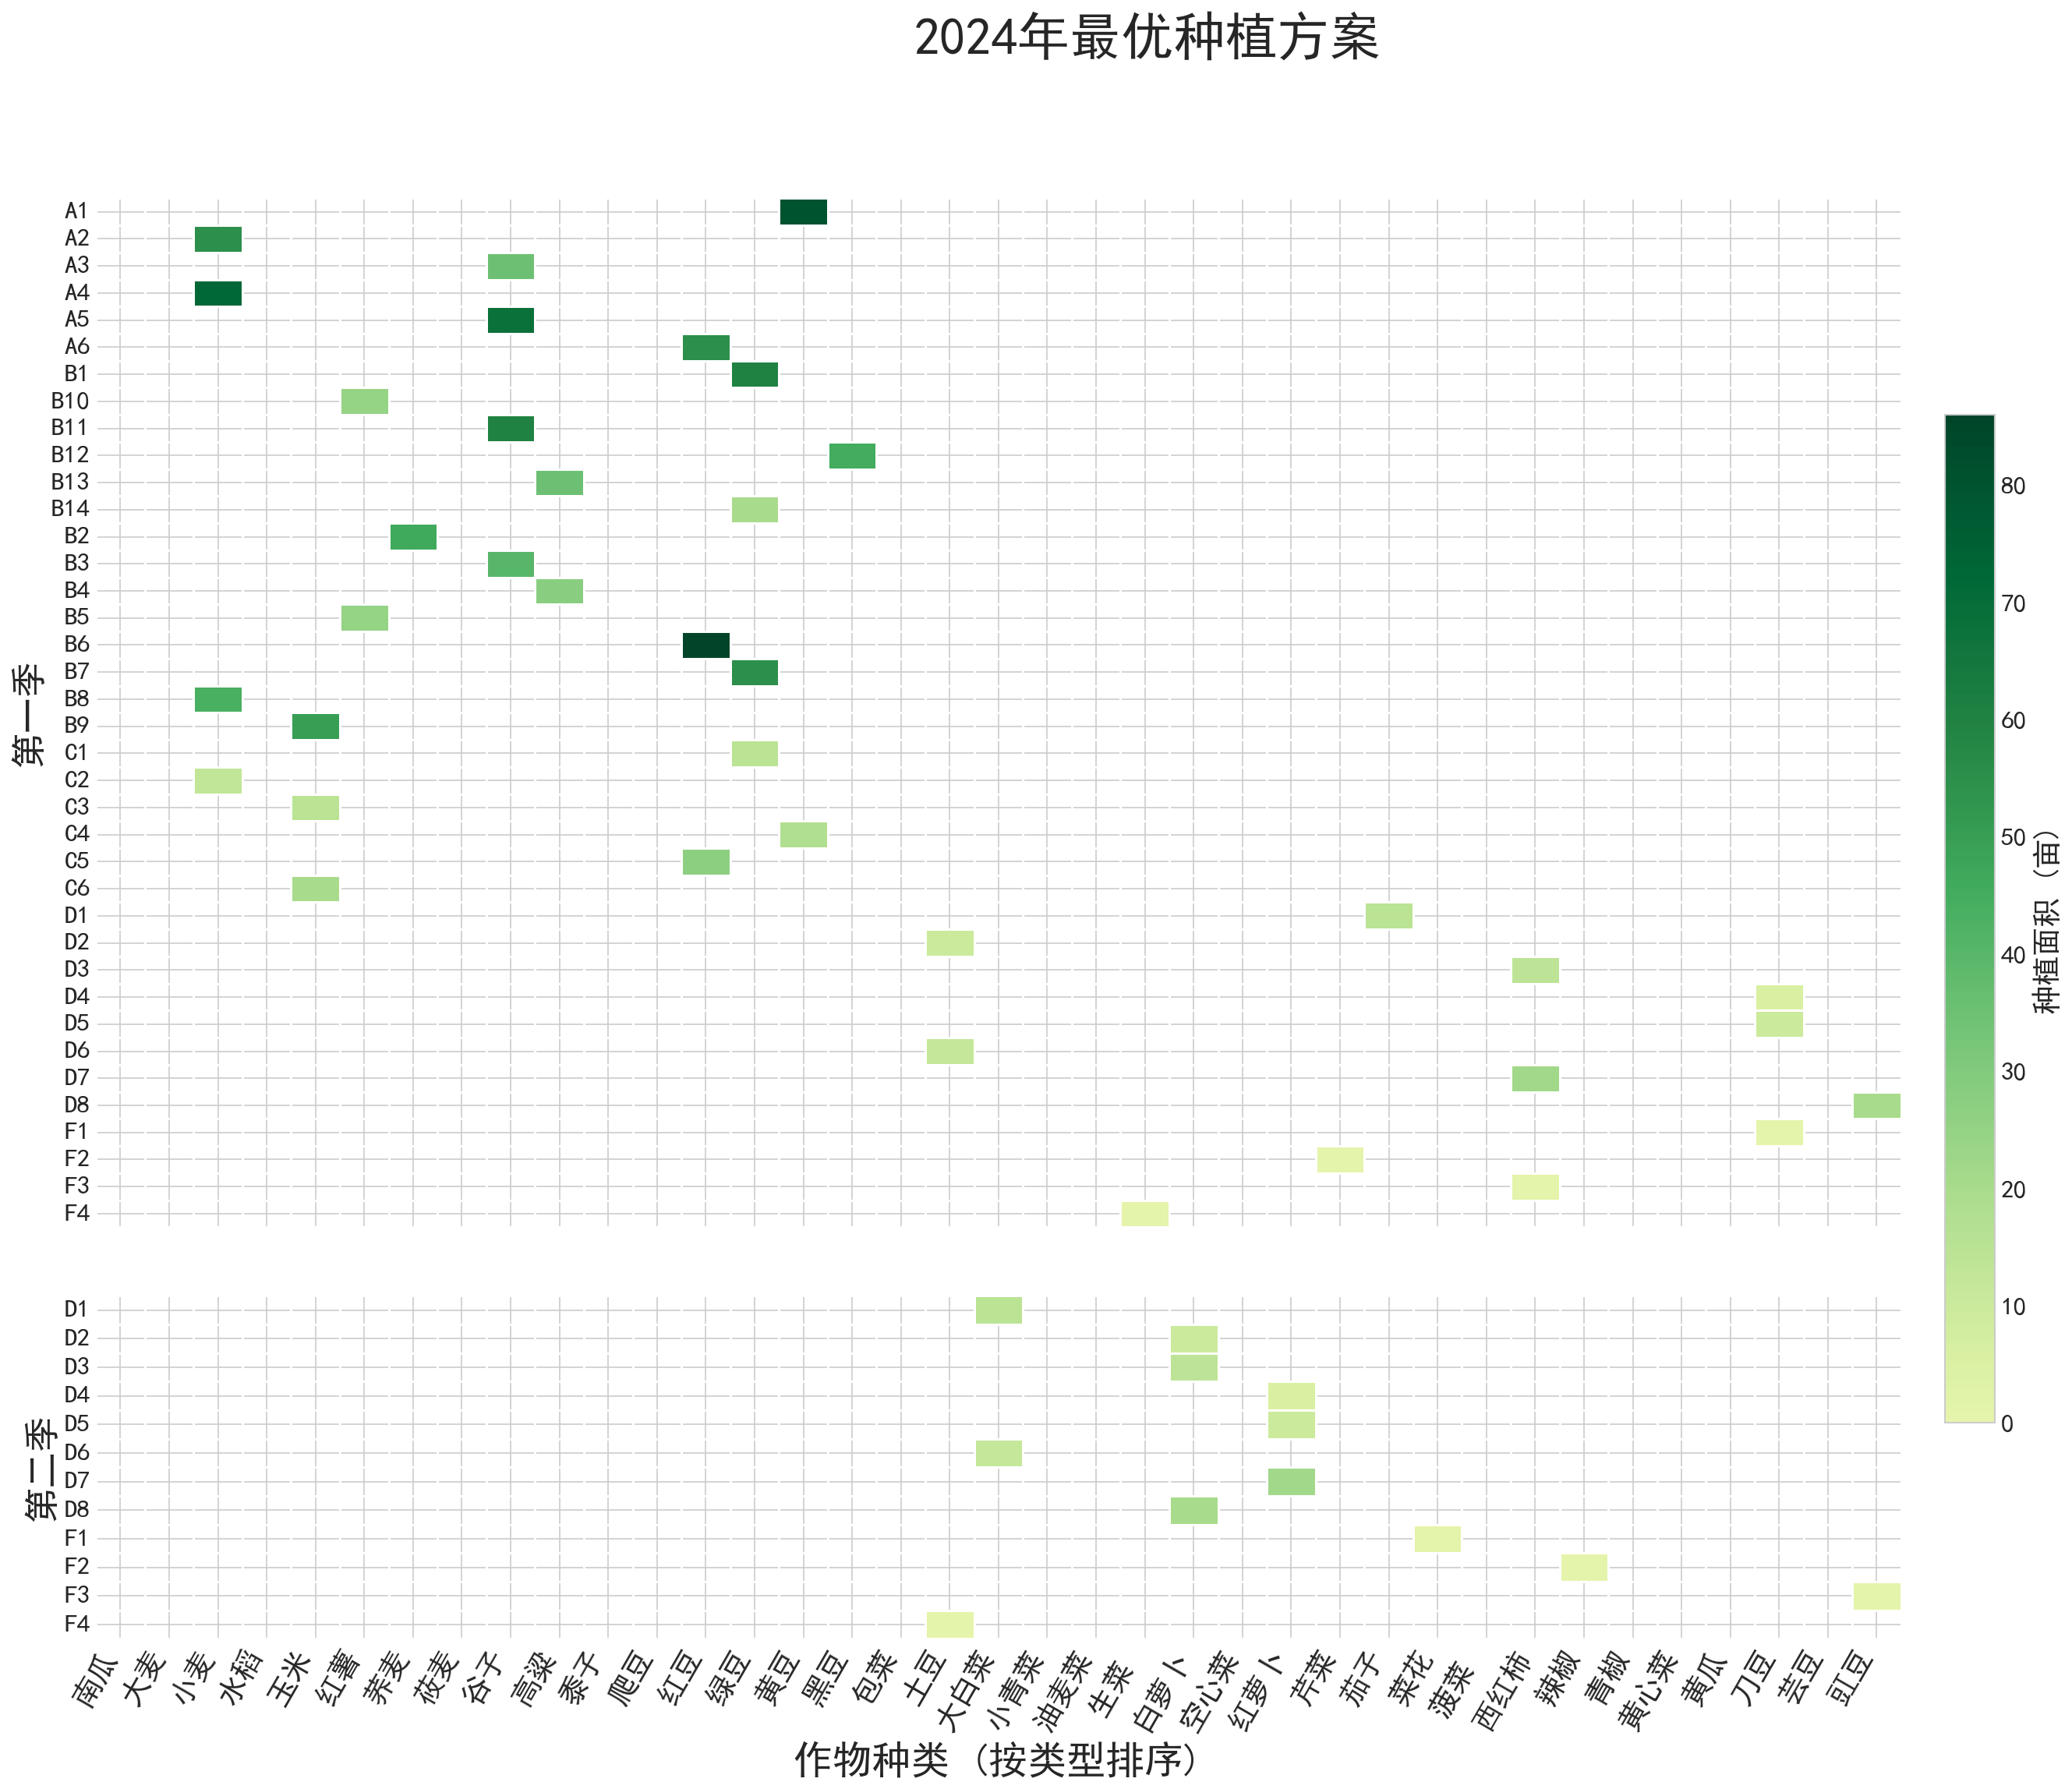

In [ ]:
# -*- coding: utf-8 -*-
# 文件名: plot_discrete_heatmap_final_polished_v3.py
# 功能: 修正中间出现X轴标签的布局问题。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

# --- 1. 绘图与文件路径配置 ---

# 设置绘图风格以符合学术审美
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 150

# 定义大字号
SUPTITLE_FONT_SIZE = 32
LABEL_FONT_SIZE = 24
YLABEL_FONT_SIZE = 22
CBAR_LABEL_FONT_SIZE = 18
XTICK_FONT_SIZE = 18
YTICK_FONT_SIZE = 16


# --- 文件路径定义 ---
INPUT_RESULT_XLSX = Path('./Result/result1_1.xlsx')
INPUT_ATTACHMENT_XLSX = Path('../Data/附件1.xlsx')
OUTPUT_IMAGE_PATH = Path('./Result/2024年最优种植方案（情况一）.png')


# --- 2. 数据加载与核心解析 ---

try:
    print("正在加载数据...")
    full_df = pd.read_excel(INPUT_RESULT_XLSX)
    crop_types_df = pd.read_excel(INPUT_ATTACHMENT_XLSX, sheet_name='乡村种植的农作物')

    # --- 根据作物类型进行智能排序 ---
    crop_to_type_map = dict(zip(crop_types_df['作物名称'], crop_types_df['作物类型']))
    all_crops_in_data = sorted(full_df['作物名称'].unique())
    sort_df = pd.DataFrame({'作物': all_crops_in_data})
    sort_df['类型'] = sort_df['作物'].map(crop_to_type_map)
    sort_df['类型'].fillna('其他', inplace=True)
    sort_df.sort_values(by=['类型', '作物'], inplace=True)
    all_crops_master_list = sort_df['作物'].tolist()
    print("横轴作物排序完成。")

    # --- 数据筛选与准备 ---
    print("筛选并处理2024年数据...")
    df = full_df[full_df['年份'] == 2024].copy()
    
    if df.empty:
        print("错误：在文件中没有找到年份为 2024 的数据记录。")
    else:
        df.rename(columns={'地块编号': '地块', '作物名称': '作物', '种植面积（亩）': '面积'}, inplace=True)
        season_map = {1: '第一季', 2: '第二季'}
        df['季节'] = df['季节'].map(season_map)
        df = df[df['面积'] > 0.01].copy()
        
        # --- 3. 为绘图准备数据 (数据透视) ---
        df_s1 = df[df['季节'] == '第一季'].copy()
        df_s2 = df[df['季节'] == '第二季'].copy()
        pivot_s1 = df_s1.pivot_table(index='地块', columns='作物', values='面积') if not df_s1.empty else pd.DataFrame()
        pivot_s2 = df_s2.pivot_table(index='地块', columns='作物', values='面积') if not df_s2.empty else pd.DataFrame()
        
        plots_s1 = sorted(df_s1['地块'].unique())
        plots_s2 = sorted(df_s2['地块'].unique())
        
        pivot_s1 = pivot_s1.reindex(index=plots_s1, columns=all_crops_master_list)
        pivot_s2 = pivot_s2.reindex(index=plots_s2, columns=all_crops_master_list)
        
        v_max_global = df['面积'].max()

        # --- 4. 核心绘图模块 ---
        
        # 创建统一的、照顾低数值的纯绿色系
        original_cmap = cm.get_cmap('YlGn')
        new_colors = original_cmap(np.linspace(0.2, 1, 256))
        custom_unified_cmap = LinearSegmentedColormap.from_list("custom_unified_green", new_colors)
        
        print("开始绘制最终版热力图...")
        
        fig = plt.figure(figsize=(24, 16))
        height_ratios = [len(plots_s1) + 1, len(plots_s2) + 1]
        gs = GridSpec(nrows=2, ncols=1, height_ratios=height_ratios, hspace=0.1)
        
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        
        # --- 【核心修改】彻底隐藏上图的X轴所有元素 ---
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.tick_params(axis='x', length=0)
        ax1.xaxis.label.set_visible(False)

        # 绘制第一季 (不绘制颜色条)
        sns.heatmap(pivot_s1, ax=ax1, cmap=custom_unified_cmap,
                    linewidths=0.5, linecolor='white',
                    cbar=False, vmin=0, vmax=v_max_global)
        ax1.set_ylabel('第一季', fontsize=YLABEL_FONT_SIZE, weight='bold')

        # 绘制第二季 (不绘制颜色条)
        sns.heatmap(pivot_s2, ax=ax2, cmap=custom_unified_cmap,
                    linewidths=0.5, linecolor='white',
                    cbar=False, vmin=0, vmax=v_max_global)
        ax2.set_ylabel('第二季', fontsize=YLABEL_FONT_SIZE, weight='bold')
        ax2.set_xlabel('作物种类 (按类型排序)', fontsize=LABEL_FONT_SIZE)
        
        # 使用更智能的方式创建单一、居中的颜色条
        mappable = ax1.collections[0]
        cbar = fig.colorbar(mappable, ax=[ax1, ax2], shrink=0.7, pad=0.02)
        cbar.set_label('种植面积 (亩)', size=CBAR_LABEL_FONT_SIZE)
        cbar.ax.tick_params(labelsize=YTICK_FONT_SIZE)

        # 字体与其他排版微调
        plt.xticks(rotation=60, ha='right', fontsize=XTICK_FONT_SIZE)
        ax1.tick_params(axis='y', labelsize=YTICK_FONT_SIZE, rotation=0)
        ax2.tick_params(axis='y', labelsize=YTICK_FONT_SIZE, rotation=0)

        fig.suptitle('2024年最优种植（情况一）', fontsize=SUPTITLE_FONT_SIZE, weight='bold')
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # --- 5. 保存与显示 ---
        OUTPUT_IMAGE_PATH.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(OUTPUT_IMAGE_PATH, dpi=300, bbox_inches='tight')
        print(f"\n图表已成功保存至: {OUTPUT_IMAGE_PATH}")
        
        plt.show()

except FileNotFoundError as e:
    print(f"错误：无法找到数据文件。请检查您的文件路径是否正确。")
    print(f"1. 结果文件应在: {INPUT_RESULT_XLSX.resolve()}")
    print(f"2. 附件文件应在: {INPUT_ATTACHMENT_XLSX.resolve()}")
except KeyError as e:
    print(f"错误：文件中似乎缺少必需的列: {e}。")
except Exception as e:
    print(f"程序发生未知错误: {e}")
    import traceback
    traceback.print_exc()